In [39]:
#import
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.stats import pearsonr

In [29]:
data = pd.read_csv("PLmatches.csv")
data = data.iloc[: , 1:]
data.head()


,Team,Date,Time,Round,Day,Venue,Result,GF,GD,GA,...,Captain,Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Manager
0,ManchesterCity,2023-08-11,20:00,Matchweek 1,Fri,Away,W,3,3,0,...,Kevin De Bruyne,4-2-3-1,Craig Pawson,17,8,13.9,0,0,0,Pep Guardiola
1,ManchesterCity,2023-08-19,20:00,Matchweek 2,Sat,Home,W,1,1,0,...,Kyle Walker,4-2-3-1,Robert Jones,14,4,17.9,0,0,0,Pep Guardiola
2,ManchesterCity,2023-08-27,14:00,Matchweek 3,Sun,Away,W,2,1,1,...,Kyle Walker,4-2-3-1,Jarred Gillett,29,9,17.3,2,0,1,Pep Guardiola
3,ManchesterCity,2023-09-02,15:00,Matchweek 4,Sat,Home,W,5,4,1,...,Kyle Walker,4-2-3-1,Michael Oliver,6,4,14.8,0,1,1,Pep Guardiola
4,ManchesterCity,2023-09-16,15:00,Matchweek 5,Sat,Away,W,3,2,1,...,Kyle Walker,4-2-3-1,Andy Madley,29,13,16.4,1,0,0,Pep Guardiola


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team       730 non-null    object 
 1   Date       730 non-null    object 
 2   Time       730 non-null    object 
 3   Round      730 non-null    object 
 4   Day        730 non-null    object 
 5   Venue      730 non-null    object 
 6   Result     730 non-null    object 
 7   GF         730 non-null    int64  
 8   GD         730 non-null    int64  
 9   GA         730 non-null    int64  
 10  Opponent   730 non-null    object 
 11  xG         730 non-null    float64
 12  xGA        730 non-null    float64
 13  Poss       730 non-null    int64  
 14  Captain    730 non-null    object 
 15  Formation  730 non-null    object 
 16  Referee    730 non-null    object 
 17  Sh         730 non-null    int64  
 18  SoT        730 non-null    int64  
 19  Dist       730 non-null    float64
 20  FK        

In [31]:
manager_winRates = data.groupby('Manager').agg(
    TotalMatches=('Manager', 'size'),
    Wins=('Result', lambda x: (x == 'W').sum())
).reset_index()

manager_winRates['WinRate'] = manager_winRates['Wins'] / manager_winRates['TotalMatches']
manager_winRates = manager_winRates.sort_values(by='WinRate', ascending=False).reset_index(drop=True)
print(manager_winRates)

                Manager  TotalMatches  Wins   WinRate
0         Pep Guardiola            36    26  0.722222
1          Mikel Arteta            36    26  0.722222
2          Jurgen Klopp            36    23  0.638889
3            Unai Emery            36    20  0.555556
4      Ange Postecoglou            36    19  0.527778
5            Eddie Howe            36    17  0.472222
6        Oliver Glasner            13     6  0.461538
7          Erik ten Hag            35    16  0.457143
8   Mauricio Pochettino            36    16  0.444444
9           David Moyes            37    14  0.378378
10        Andoni Iraola            37    13  0.351351
11          Gary O'Neil            37    13  0.351351
12           Sean Dyche            37    13  0.351351
13     Roberto De Zerbi            36    12  0.333333
14          Marco Silva            37    12  0.324324
15         Thomas Frank            37    10  0.270270
16          Roy Hodgson            24     6  0.250000
17  Nuno Espírito Santo     

In [32]:
manager_lossRates = data.groupby('Manager').agg(
    TotalMatches=('Manager', 'size'),
    Loss=('Result', lambda x: (x == 'L').sum())
).reset_index()

manager_lossRates['lossRate'] = manager_lossRates['Loss'] / manager_lossRates['TotalMatches']
manager_lossRates = manager_lossRates.sort_values(by='lossRate', ascending=True).reset_index(drop=True)
print(manager_lossRates)

                Manager  TotalMatches  Loss  lossRate
0         Pep Guardiola            36     3  0.083333
1          Jurgen Klopp            36     4  0.111111
2          Mikel Arteta            36     5  0.138889
3        Oliver Glasner            13     3  0.230769
4            Unai Emery            36     9  0.250000
5      Ange Postecoglou            36    11  0.305556
6   Mauricio Pochettino            36    11  0.305556
7      Roberto De Zerbi            36    12  0.333333
8           David Moyes            37    13  0.351351
9            Eddie Howe            36    13  0.361111
10         Erik ten Hag            35    13  0.371429
11        Andoni Iraola            37    15  0.405405
12           Sean Dyche            37    15  0.405405
13          Marco Silva            37    17  0.459459
14          Gary O'Neil            37    17  0.459459
15         Thomas Frank            37    18  0.486486
16          Roy Hodgson            24    12  0.500000
17         Steve Cooper     

                      Team  AveragePossession
0           ManchesterCity          65.583333
1         TottenhamHotspur          61.444444
2                Liverpool          61.166667
3    BrightonandHoveAlbion          60.083333
4                  Chelsea          58.916667
5                  Arsenal          58.250000
6               AstonVilla          53.638889
7          NewcastleUnited          52.277778
8         ManchesterUnited          50.800000
9                   Fulham          50.378378
10  WolverhamptonWanderers          49.297297
11                 Burnley          46.729730
12               Brentford          44.891892
13             Bournemouth          44.567568
14               LutonTown          42.405405
15           CrystalPalace          41.972973
16           WestHamUnited          41.432432
17                 Everton          41.054054
18        NottinghamForest          40.918919
19         SheffieldUnited          36.162162


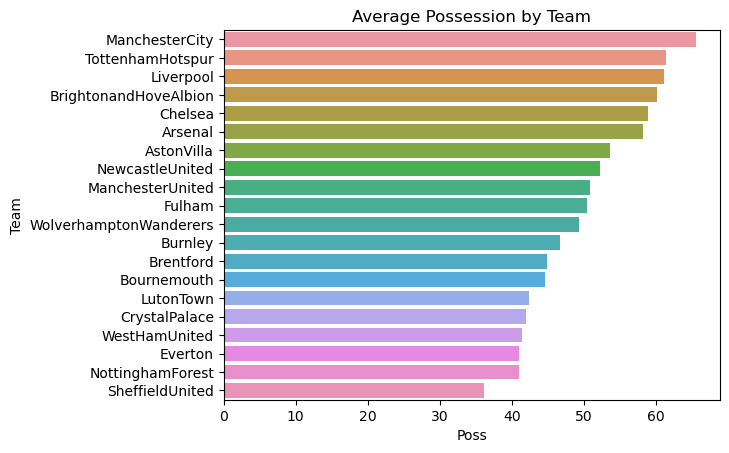

In [46]:
team_info = data.groupby('Team').agg(
    AveragePossession=('Poss', 'mean')
).reset_index()

team_info = team_info.sort_values(by='AveragePossession', ascending=False).reset_index(drop=True)

print(team_info)

sns.barplot(x='Poss', y='Team', data=team_possession.sort_values(by='Poss', ascending=False))
plt.title('Average Possession by Team')
plt.show()

In [36]:
# Group by 'Team' and count unique 'Manager'
team_manager_counts = data.groupby('Team')['Manager'].nunique().reset_index()


# Filter teams with more than one manager
teams_with_multiple_managers = team_manager_counts[team_manager_counts['Manager'] > 1]

print(teams_with_multiple_managers)

                Team  Manager
7      CrystalPalace        2
15  NottinghamForest        2
16   SheffieldUnited        2


In [41]:
data['ResultEncoded'] = data['Result'].apply(lambda x: 1 if x == 'W' else 0)

# Calculate the correlation between Shots and ResultEncoded
correlation, p_value = pearsonr(data['Sh'], data['ResultEncoded'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.2900099285957614
P-value: 1.2994457534618984e-15


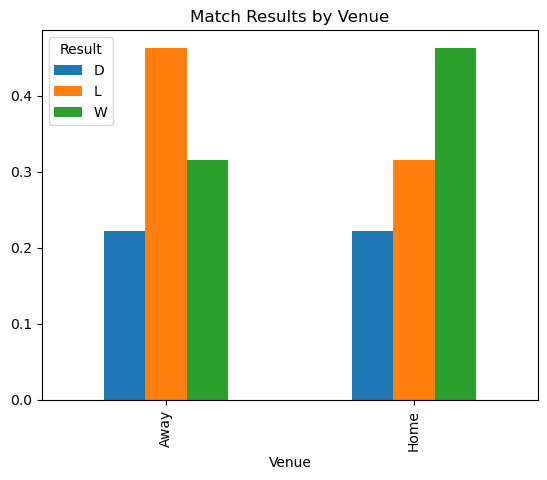

In [51]:
venue_performance = data.groupby('Venue')['Result'].value_counts(normalize=True).unstack().fillna(0)
venue_performance.plot(kind='bar')
plt.title('Match Results by Venue')
plt.show()

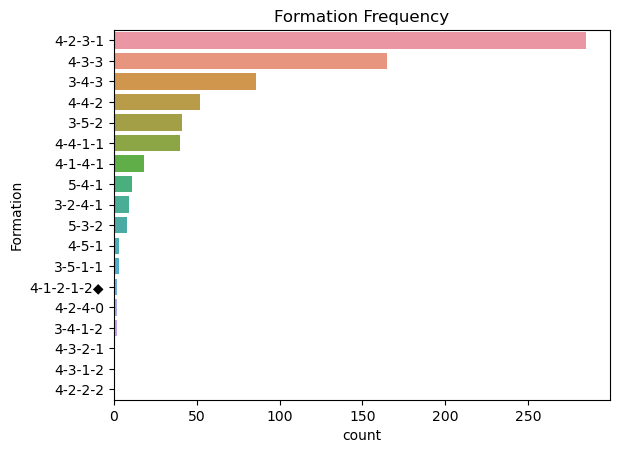

In [47]:
sns.countplot(y='Formation', data=data, order=data['Formation'].value_counts().index)
plt.title('Formation Frequency')
plt.show()

In [52]:
data['ResultEncoded'] = data['Result'].apply(lambda x: 1 if x == 'W' else 0)

# Calculate the correlation between Possession and ResultEncoded
correlation, p_value = pearsonr(data['Poss'], data['ResultEncoded'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.2096451229571734
P-value: 1.0762315343793685e-08


In [54]:
low_possession_wins = data[(data['Poss'] < 50) & (data['Result'] == 'W')]
print(len(low_possession_wins))

107
